# Seeds Dataset

Alumno: Javier Hernán Mora

Dataset: https://archive.ics.uci.edu/ml/datasets/seeds

To construct the data, seven geometric parameters of wheat kernels were measured:

1. area A,
2. perimeter P,
3. compactness C = 4*pi*A/P^2,
4. length of kernel,
5. width of kernel,
6. asymmetry coefficient
7. length of kernel groove.

All of these parameters were real-valued continuous.

In [1]:
import pandas as pd
df = pd.read_csv('./dataset/seeds_dataset.txt')
df.sort_values('label')
df

,area,perimeter,compactness,length,width,asymmetry,length_groove,label
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1
...,...,...,...,...,...,...,...,...
205,12.19,13.20,0.8783,5.137,2.981,3.631,4.870,3
206,11.23,12.88,0.8511,5.140,2.795,4.325,5.003,3
207,13.20,13.66,0.8883,5.236,3.232,8.315,5.056,3
208,11.84,13.21,0.8521,5.175,2.836,3.598,5.044,3


In [2]:
df.describe()

,area,perimeter,compactness,length,width,asymmetry,length_groove,label
count,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000
mean,14.847524,14.559286,0.870999,5.628533,3.258605,3.700201,5.408071,2.000000
std,2.909699,1.305959,0.023629,0.443063,0.377714,1.503557,0.491480,0.818448
min,10.590000,12.410000,0.808100,4.899000,2.630000,0.765100,4.519000,1.000000
25%,12.270000,13.450000,0.856900,5.262250,2.944000,2.561500,5.045000,1.000000
50%,14.355000,14.320000,0.873450,5.523500,3.237000,3.599000,5.223000,2.000000
75%,17.305000,15.715000,0.887775,5.979750,3.561750,4.768750,5.877000,3.000000
max,21.180000,17.250000,0.918300,6.675000,4.033000,8.456000,6.550000,3.000000


## Normalizando el dataframe

Ya que existen valores maximos y minimos relativamente alejados no se utilizará normalización por minmax. 
Se utiliza normalización por deviación standard.

In [3]:
def normalize_dataframe(df):
    return (df - df.mean()) / df.std()

labels_true = df.pop('label')
headers = df.columns
normalized_df = normalize_dataframe(df)
x = normalized_df.values

normalized_df

,area,perimeter,compactness,length,width,asymmetry,length_groove
0,0.141759,0.214949,0.000060,0.303493,0.141364,-0.983801,-0.382663
1,0.011161,0.008204,0.427494,-0.168223,0.196962,-1.783904,-0.919816
2,-0.191609,-0.359342,1.438945,-0.761817,0.207552,-0.665888,-1.186357
3,-0.346264,-0.474200,1.036904,-0.687336,0.318747,-0.958528,-1.227051
4,0.444196,0.329807,1.371233,0.066507,0.803240,-1.559768,-0.474223
...,...,...,...,...,...,...,...
205,-0.913333,-1.040834,0.308997,-1.109397,-0.734959,-0.046025,-1.094797
206,-1.243264,-1.285864,-0.842110,-1.102626,-1.227395,0.415547,-0.824186
207,-0.566218,-0.688602,0.732199,-0.885953,-0.070436,3.069254,-0.716349
208,-1.033620,-1.033176,-0.799790,-1.023631,-1.118847,-0.067973,-0.740765


## Clases auxiliares para graficar

Estas clases auxiliares me sirven para graficar a continuación los resultados de los metodos de agrupamiento. Ambas clases reciben los mismos parámetros, y tienen un único método `plot()`

- `x`: El set de datos normalizado
- `headers`: Una lista de strings con los nombres de los atributos del set de datos `x` (Uno por columna de `x`)
- `labels`: Un array de ints que represente el cluster al que pertenece cada elemento de `x` luego de aplicar el método de clustering (uno por fila de `x`)

La clase `PlotMultidim` grafica todas las combinaciones posibles entre los distintos atributos del dataset `x`.

La clase `PlotHeatmap` genera un heatmap en base a la matriz de similaridad. Esta matriz la calcula con las distancias de cada elemento de `x` a cada otro elemento de `x`. 


In [4]:
import matplotlib.pyplot as plt
import itertools
import pandas as pd
import numpy as np

class PlotMultidim:
    def __init__(self, x, headers, labels):
        self.x = x
        self.headers = headers
        self.labels = labels
        self.tot_dim = len(self.headers)

    def plot(self):
        plt.figure(figsize=(18,18))

        combinations = itertools.combinations(range(self.tot_dim), 2)
        for comb in combinations:
            self._make_subplot(comb[0], comb[1])

        plt.show()

    def _make_subplot(self, a, b):
        sub = plt.subplot(self.tot_dim, self.tot_dim, self.tot_dim * a + b)
        sub.set_xlabel(self.headers[a])
        sub.set_ylabel(self.headers[b])
        plt.scatter(self.x[:, a], self.x[:, b], c=self.labels)


class PlotHeatmap:
    def __init__(self, x, headers, labels):
        self.x = x
        self.headers = headers
        self.labels = labels

    def plot(self):
        df = pd.DataFrame(self.x, columns=self.headers)
        df['cluster'] = self.labels
        df = df.sort_values('cluster')
        
        cvalues = df['cluster'].values
        cluster_matrix = np.array([cvalues for a in range(10)])
        
        df.pop('cluster')

        vals = df.values
        heatmap_matrix = np.array([[np.linalg.norm(a-b) for b in vals] for a in vals])
    
        # definitions for the axes
        left, bottom, width, height = 0.1, 0.1, 0.65, 0.65
        
        rect_heatmap = [left, bottom, width, height]
        rect_clusters = [left, bottom + height, width, 0.1]

        fig = plt.figure(figsize=(8, 8))
        ax1 = fig.add_axes(rect_heatmap)
        ax2 = fig.add_axes(rect_clusters, sharex=ax1)
        ax2.tick_params(labelbottom=False, labeltop=False, labelleft=False, labelright=False)
        
        ax1.imshow(heatmap_matrix, cmap='hot', interpolation='nearest')
        ax2.imshow(cluster_matrix, interpolation='nearest')
        
        plt.show()

## Aplicando KMeans (K=3) y graficando en 7 dimensiones

Se aplica KMeans sobre el dataset previamente normalizado, utilizando 3 clusters (ya que son 3 tipos de semillas distintas). A continuación, se grafican las 7 dimensiones para verificar si el clustering es bueno y los clusters estan bien definidos. 

A continuación se grafica un heatmap usando la matriz de similaridad

In [5]:
from sklearn.cluster import KMeans

labels_pred = KMeans(n_clusters=3, random_state=0).fit_predict(x)

In [6]:
from sklearn import metrics
metrics.adjusted_rand_score(labels_true, labels_pred)

0.7732937360806309

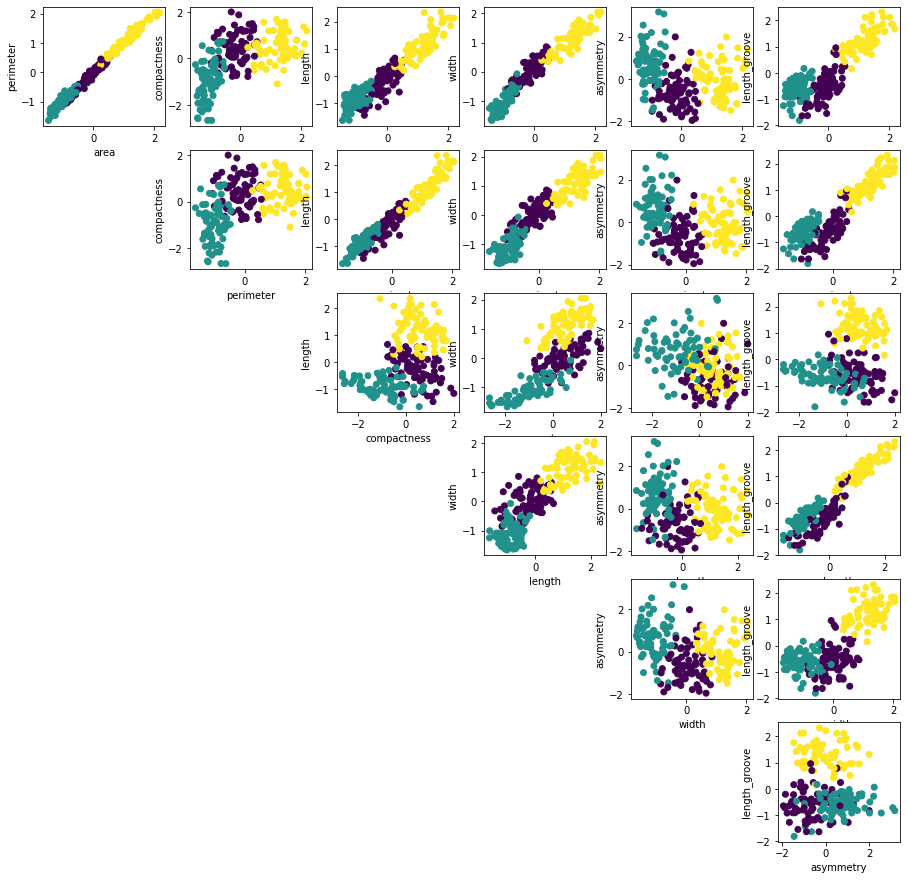

In [7]:
PlotMultidim(x, headers, labels_pred).plot()

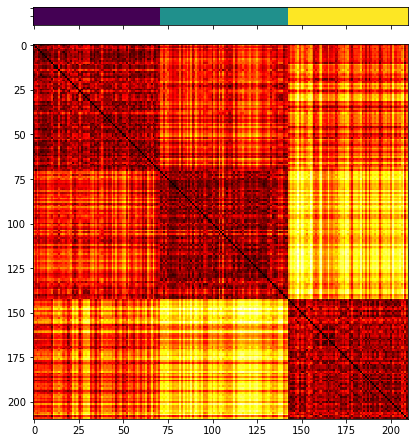

In [8]:
PlotHeatmap(x, headers, labels_pred).plot()

## Repitiendo el mismo heatmap para K=5 clusters

Se puede ver que el agrupamiento no es óptimo y que los ultimos clusters estan bastante superpuestos y no estan bien definidos.

In [9]:
from sklearn.cluster import KMeans

labels_pred = KMeans(n_clusters=5, random_state=0).fit_predict(x)

In [10]:
from sklearn import metrics
metrics.adjusted_rand_score(labels_true, labels_pred)

0.5123573653917716

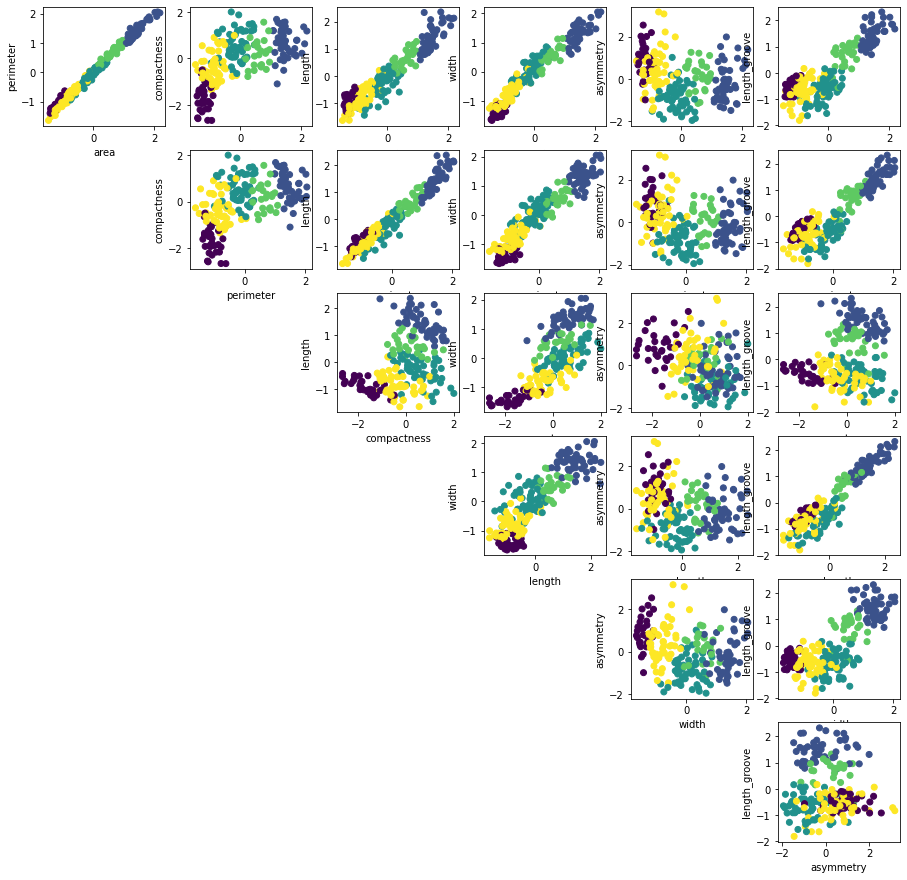

In [11]:
PlotMultidim(x, headers, labels_pred).plot()

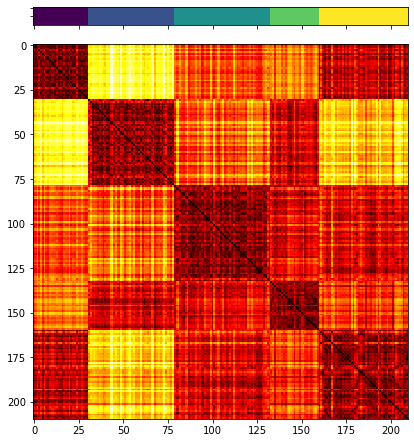

In [12]:
PlotHeatmap(x, headers, labels_pred).plot()

## Subtractive Clustering con Ra = 2

Se puede ver que si bien el clustering genera clusters bien definidos, el tamaño de cada cluster es irregular y no se condice con el tamaño que debería tener realmente (En el dataset original hay 70 semillas de cada tipo de trigo)


In [13]:
from subclust2 import subclust2
labels_pred, centers = subclust2(x, 2)

In [14]:
from sklearn import metrics
metrics.adjusted_rand_score(labels_true, labels_pred)

0.4859382349987579

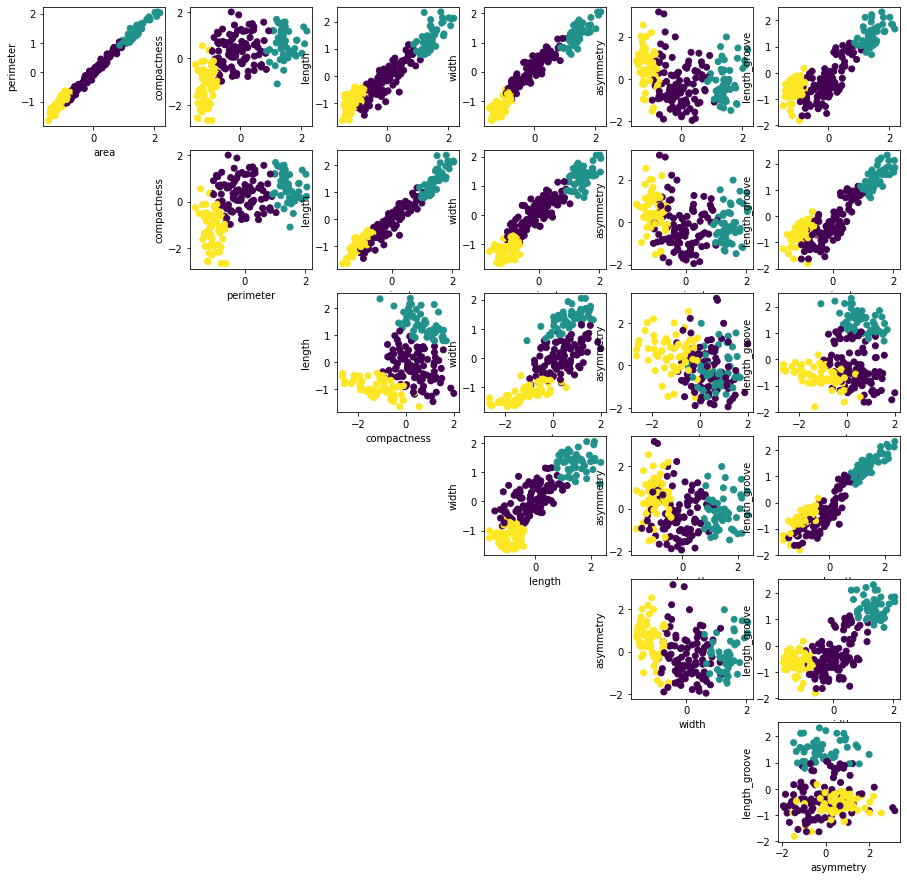

In [15]:
PlotMultidim(x, headers, labels_pred).plot()

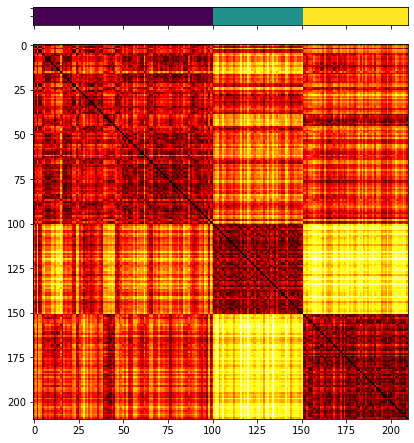

In [16]:
PlotHeatmap(x, headers, labels_pred).plot()

## Subtractive Clustering con Ra = 1.1

Aquí el numero de clusters se incrementa y la superposicion de clusters es obvia.

In [17]:
from subclust2 import subclust2

labels_pred, centers = subclust2(x, 1.1)

In [18]:
from sklearn import metrics
metrics.adjusted_rand_score(labels_true, labels_pred)

0.36838491512690275

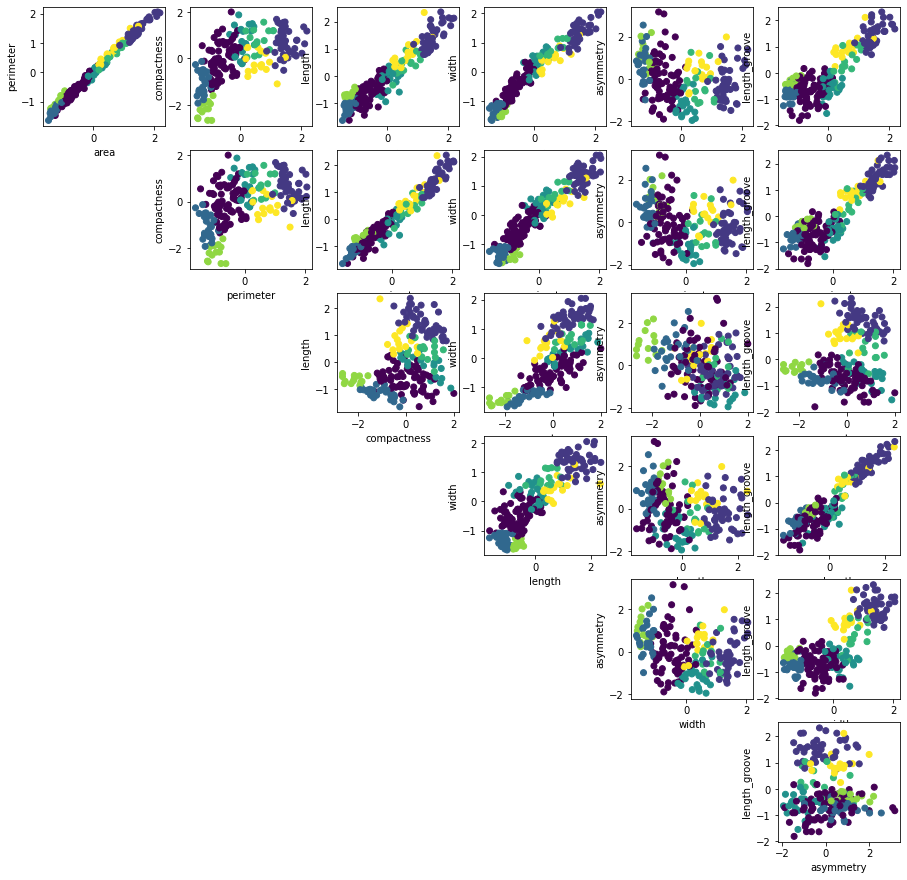

In [19]:
PlotMultidim(x, headers, labels_pred).plot()

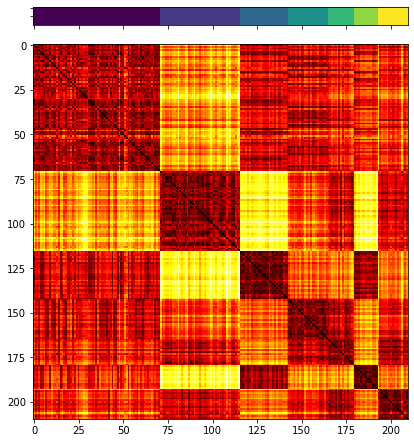

In [20]:
PlotHeatmap(x, headers, labels_pred).plot()

## Conclusión

De acuerdo con los scores asignados por la función `metrics.adjusted_rand_score(labels_true, labels_pred)`, que toma los labels originales del set de datos podemos ver que usando KMeans con K=3, se logra la aproximación más cercana al clustering original. Esto además es verificable de forma gráfica viendo los gráficos de puntos en 7 dimensiones y los heatmap de las matrices de similaridad. 

Esto no significa que Clustering Substractivo sea un mal algoritmo, solo que para este caso no logra un resultado óptimo. Esto podría deberse a que KMeans siempre asume formas de blob (gota) de dimensiones iguales en cada uno de los clusters. Y este set de datos justamente tiene 70 ejemplares de cada tipo de semilla de trigo. En un set de datos con un numero irregular de semillas quizas el algoritmo KMeans no daría resultados tan optimos. 
